# **Iris Species Classification using K Nearest Neighbours (KNN)**

### Importing Libraries

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### Getting Data

In [68]:
df = pd.read_csv('/content/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Data Preprocessing

In [69]:
df = df.drop(['Id'], axis = 1)  # dropping unnecessary column
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Data Visualization

In [70]:
df.info()   # getting an insight into the type of data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


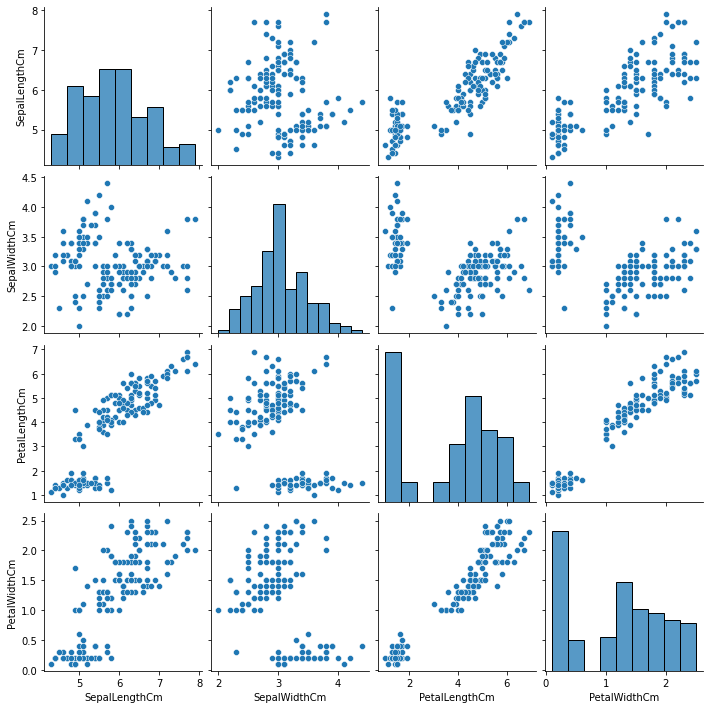

In [71]:
sns.pairplot(df)  # to show relation between columns
plt.show()

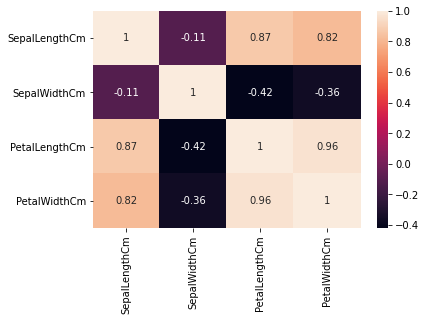

In [72]:
corr = df.corr()
sns.heatmap(corr, annot=True)  # quantifying the relationship

### Label Encoding

In [73]:
label_encoder = preprocessing.LabelEncoder()  # for columns not with int/float type values

In [74]:
df['Species'] = label_encoder.fit_transform(df['Species'])   # label encoding 'Species' column  
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [75]:
df['Species'].value_counts()  # count of each type of species

2    50
1    50
0    50
Name: Species, dtype: int64

### Data Normalization

In [35]:
a = df.values  

In [37]:
# Data Standardization gives data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases
df = pd.DataFrame(preprocessing.StandardScaler().fit_transform(a))
df

,0,1,2,3,4
0,-0.900681,1.032057,-1.341272,-1.312977,-1.224745
1,-1.143017,-0.124958,-1.341272,-1.312977,-1.224745
2,-1.385353,0.337848,-1.398138,-1.312977,-1.224745
3,-1.506521,0.106445,-1.284407,-1.312977,-1.224745
4,-1.021849,1.263460,-1.341272,-1.312977,-1.224745
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,1.224745
146,0.553333,-1.281972,0.705893,0.922064,1.224745
147,0.795669,-0.124958,0.819624,1.053537,1.224745
148,0.432165,0.800654,0.933356,1.447956,1.224745


In [40]:
df_new = df.rename(columns={0:'SepalLengthCm',1:'SepalWidthCm',2:'PetalLengthCm',3:'PetalWidthCm',4:'Species'}) # renaming the columns
df_new

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,1.032057,-1.341272,-1.312977,-1.224745
1,-1.143017,-0.124958,-1.341272,-1.312977,-1.224745
2,-1.385353,0.337848,-1.398138,-1.312977,-1.224745
3,-1.506521,0.106445,-1.284407,-1.312977,-1.224745
4,-1.021849,1.263460,-1.341272,-1.312977,-1.224745
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,1.224745
146,0.553333,-1.281972,0.705893,0.922064,1.224745
147,0.795669,-0.124958,0.819624,1.053537,1.224745
148,0.432165,0.800654,0.933356,1.447956,1.224745


In [46]:
df_new['Species'] = df_new['Species'].astype('int32')  # converting into 'int' data type for predictions
df_new

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,1.032057,-1.341272,-1.312977,-1
1,-1.143017,-0.124958,-1.341272,-1.312977,-1
2,-1.385353,0.337848,-1.398138,-1.312977,-1
3,-1.506521,0.106445,-1.284407,-1.312977,-1
4,-1.021849,1.263460,-1.341272,-1.312977,-1
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,1
146,0.553333,-1.281972,0.705893,0.922064,1
147,0.795669,-0.124958,0.819624,1.053537,1
148,0.432165,0.800654,0.933356,1.447956,1


### Splitting Data for Training and Testing

In [47]:
data = df_new.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=0)  # splitting in the ratio 80:20

### Training the Model

In [48]:
# letting k = 3
k = 3
# training model and predicting  
kclf = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
kclf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### Making Predictions

In [50]:
y_pred = kclf.predict(X_test)

### Checking Accuracy

In [52]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, kclf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.9666666666666667
Test set Accuracy:  0.9666666666666667


### **Classification is 96.67% accurate.**